In [1]:
import numpy as np
import cv2
from skimage import io
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix
import math
from skimage.util import img_as_float
%matplotlib inline

In [2]:
def drawPixels(image, location):
    x,y = location
    w,h=image.shape[0],image.shape[1]
    for row in range(20):
        for col in range(20):
            if(row+x)>=w:
                c=x
            else:
                c=row+x
            if(col+y)>=h:
                d=y
            else:
                d=col+y
            image[c][d] = [255, 0, 0]

    return image

def drawPixel(image, x, y):

    image[x][y] = [255, 0, 0]
    return image

In [5]:
img=io.imread('dataset.jpg')
w = img.shape[0]
h = img.shape[1]
res = np.zeros((8,8,8))

def color2ind(pixel):
    rind = math.floor(pixel[0]/32)
    gind = math.floor(pixel[1]/32)
    bind = math.floor(pixel[2]/32)
    return (rind,gind,bind)

entropies=[]
pairEntropy={}
for i in range(w):
    for j in range(h):
        rind,gind,bind = color2ind(img[i,j])
        res[rind,gind,bind] += 1
        pairEntropy[str(rind)+" "+str(gind)+" "+str(bind)]=str(i)+"-"+str(j)
fres = res / res.sum()
fres_ = fres
fres=fres.flatten()
indexs = fres.nonzero()[0]
entropy = 0 
prob_list = fres.tolist()
for i in indexs:
    entropy -= prob_list[i] * math.log2(prob_list[i])
    entropies.append(-1* prob_list[i] * math.log2(prob_list[i]))
print("Entropy =", entropy) 

Entropy = 3.667390498891591


In [6]:
entropies.sort()
minValueE=9.489937660769138e-05
j=0
for i in entropies:
    if i>minValueE:
        print(i)
        j+=1
print(j)

0.00011216678834958256
0.00011216678834958256
0.00012917207452703563
0.00012917207452703563
0.00012917207452703563
0.00012917207452703563
0.00012917207452703563
0.00012917207452703563
0.00012917207452703563
0.00012917207452703563
0.00014595296172931454
0.00014595296172931454
0.00014595296172931454
0.00014595296172931454
0.0001625376581032688
0.0001625376581032688
0.00017894805877093832
0.00017894805877093832
0.00019520165505466268
0.00019520165505466268
0.0002113127433658318
0.0002113127433658318
0.00024315317683184902
0.00024315317683184902
0.00025890121412123243
0.00025890121412123243
0.00029009050775763223
0.00029009050775763223
0.00029009050775763223
0.00029009050775763223
0.00030554406620653764
0.0003209106118464579
0.0003209106118464579
0.0003209106118464579
0.0003361947286529877
0.0003965838200649969
0.0004115105523394724
0.0004559244092192536
0.00047061437248979433
0.00047061437248979433
0.00047061437248979433
0.00047061437248979433
0.0005143674024728138
0.0005576795096565999
0

In [8]:
for i in pairEntropy.keys():
    a,b,c=i.split(" ")
    if fres_[int(a),int(b),int(c)]>minValueE:
        print(pairEntropy[i])

718-1158
719-364
719-218
719-1193
719-1267
719-110
719-1134
711-153
711-152
641-127
621-333
691-151
719-1224
719-1231
719-1244
719-1276
705-153
694-153
712-152
719-1243
719-1241
719-153
719-767
639-128
586-348
719-152
622-348
710-153
719-1225
719-681
719-1271
719-1278
719-1272
719-926
719-1277
719-1279
719-1188
719-155
719-1135
691-150
719-1247
719-1246
719-1235
719-1178
719-1194
718-1117
719-1182
716-603
715-150
640-127
639-129
718-666
719-1175
719-1266
718-742
692-151
714-1241
718-1190
658-791
638-129
719-1104
716-666
712-153
626-355
696-150
647-123
719-1240
719-1112
718-687
718-300
719-641
719-1234
719-584
718-1189
718-1237
715-528
719-1219
719-692
718-1084
718-1112
719-1242
719-1136


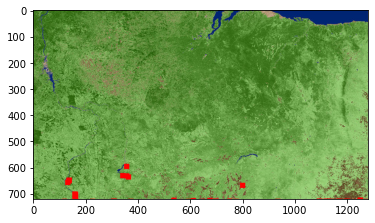

In [9]:
imageArrayE = np.array(plt.imread('dataset.jpg'), dtype=np.uint8)


for i in pairEntropy.keys():
    a,b,c=i.split(" ")
    if fres_[int(a),int(b),int(c)]>minValueE:
        indices=pairEntropy[i]
        x,y=indices.split("-")
        drawPixels(imageArrayE,(int(x),int(y)))
plt.imshow(imageArrayE)

In [12]:
pairJE={}
res_je = np.zeros((8,8,8,8,8,8)) 
for i in range(w):
    for j in range(h):
        rind,gind,bind = color2ind(img[i,j])
        for di,dj in ((-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1)):
            ii=i+di
            jj=j+dj
            if ii < 0 or ii >= w or jj < 0 or jj >= h:
                continue
            rind1,gind1,bind1 = color2ind(img[ii,jj])
            res_je[rind,gind,bind,rind1,gind1,bind1] += 1
            pairJE[str(rind)+" "+str(gind)+" "+str(bind)+" "+str(rind1)+" "+str(gind1)+" "+str(bind1)]=str(i)+"-"+str(j)+"-"+str(ii)+"-"+str(jj)
jEntrpopies=[]           
fres_je = res_je / res_je.sum()
fres_je_ = fres_je
fres_je = fres_je.flatten()
indexs_je = fres_je.nonzero()[0] 
j_entropy = 0
prob_list = fres_je.tolist()
for i in indexs_je:
    j_entropy -= prob_list[i] * math.log2(prob_list[i])
    jEntrpopies.append(-1*prob_list[i] * math.log2(prob_list[i]))
print("Joint entropy = ", j_entropy)

Joint entropy =  6.563655422181357


In [13]:
pairJE

{'0 1 0 1 3 1': '706-0-705-1',
 '0 1 0 0 1 0': '712-0-711-0',
 '0 1 0 3 4 2': '718-1158-717-1158',
 '1 3 1 0 1 0': '705-1-706-0',
 '1 3 1 1 3 0': '719-13-719-14',
 '1 3 1 3 4 2': '717-557-718-557',
 '1 3 1 4 5 2': '713-268-712-267',
 '1 3 0 1 3 1': '719-14-719-13',
 '1 3 0 1 3 0': '719-208-718-208',
 '1 3 0 3 4 2': '719-208-719-209',
 '1 3 0 4 5 2': '715-274-714-275',
 '1 3 0 4 6 3': '719-208-718-209',
 '1 3 1 1 3 1': '719-13-718-13',
 '1 3 1 4 6 3': '716-476-717-476',
 '1 3 1 3 5 3': '716-476-717-475',
 '1 3 1 1 2 0': '716-13-715-12',
 '1 2 0 1 3 1': '715-12-716-13',
 '1 2 0 1 2 0': '718-211-717-211',
 '1 2 0 3 5 3': '717-127-718-127',
 '1 2 0 3 4 2': '719-1193-718-1192',
 '1 2 0 2 4 2': '716-1097-717-1097',
 '1 2 0 3 5 2': '719-284-718-284',
 '1 2 0 2 3 1': '719-1168-718-1168',
 '1 2 0 4 6 3': '717-127-718-128',
 '2 3 1 1 2 0': '719-1127-719-1128',
 '2 3 1 3 5 2': '719-1267-718-1267',
 '2 3 1 4 6 3': '719-1267-719-1268',
 '2 3 1 4 5 3': '719-1267-718-1268',
 '1 2 0 4 5 3': '719-1162-

In [14]:
jEntrpopies.sort() 
minvalueJE=0.00030985129824991173 
for i in jEntrpopies:
    if i>minvalueJE:
        print(i)

0.00031177690078345124
0.00031177690078345124
0.00031177690078345124
0.00031177690078345124
0.00031370116999420756
0.00031370116999420756
0.00031370116999420756
0.00031370116999420756
0.00031562411489125593
0.00031562411489125593
0.00031754574436274177
0.00031754574436274177
0.00031754574436274177
0.00031754574436274177
0.0003194660671782992
0.0003194660671782992
0.0003194660671782992
0.0003194660671782992
0.0003213850919914056
0.0003213850919914056
0.0003233028273416744
0.0003233028273416744
0.0003233028273416744
0.0003233028273416744
0.00032521928165708775
0.00032521928165708775
0.00032521928165708775
0.00032521928165708775
0.00032713446325617103
0.00032713446325617103
0.00032904838035011173
0.00032904838035011173
0.00032904838035011173
0.00032904838035011173
0.00033096104104482336
0.00033096104104482336
0.00033287245334295737
0.00033287245334295737
0.0003347826251458638
0.0003347826251458638
0.00033669156425550253
0.00033669156425550253
0.0003405057751170023
0.0003405057751170023
0.

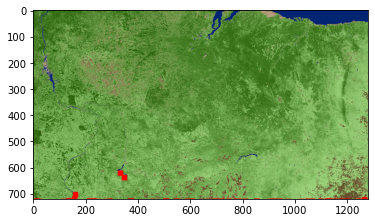

In [15]:
imageArrayJE = np.array(plt.imread('dataset.jpg'), dtype=np.uint8)
for i in pairJE.keys():
    a,b,c,d,e,f=i.split(" ")
    if fres_je_[int(a),int(b),int(c),int(d),int(e),int(f)]>minvalueJE:# display indices by shades
        indices=pairJE[i]
        x,y,z,k=indices.split("-")
        drawPixels(imageArrayJE,(int(x),int(y)))
        drawPixels(imageArrayJE,(int(z),int(k)))

plt.imshow(imageArrayJE)

In [17]:
mi = 0
miList=[]
pairMI={}
for rind in range(8):
    for gind in range(8):
        for bind in range(8):
            px = fres_[rind,gind,bind]
            if px != 0:
                for rind1 in range(8):
                    for gind1 in range(8):
                        for bind1 in range(8):
                            pxy = fres_je_[rind,gind,bind,rind1,gind1,bind1]
                            py=fres_[rind1,gind1,bind1]
                            if pxy != 0:
                                mi+=pxy*math.log2(pxy / (px*py))
                                miList.append(pxy*math.log2(pxy / (px*py)))
                                pairMI[pairJE[str(rind)+" "+str(gind)+" "+str(bind)+" "+str(rind1)+" "+str(gind1)+" "+str(bind1)]]=pxy*math.log2(pxy / (px*py))
print("Mutual information =",mi)

Mutual information = 0.7610873517491835


In [18]:
miList.sort()
minValueMI=0.00039749940972366244
for i in miList:
    if i>minValueMI:
        print(i)

0.0004006580509778256
0.0004006580509778256
0.0004017519235101207
0.0004017519235101207
0.00040970146036320524
0.00040970146036320524
0.000410890835664016
0.000410890835664016
0.0004173348582631676
0.00041846141633331165
0.00041846141633331165
0.0004187043376338064
0.0004187043376338064
0.00042377471971159726
0.00043092008288053485
0.00043092008288053485
0.000443257819015843
0.000443257819015843
0.00044337831900865605
0.00044337831900865605
0.0004447270541556056
0.0004447270541556056
0.00044701712501024615
0.00044701712501024615
0.00044702006378057084
0.00044702006378057084
0.00046360949071433773
0.0004921145356013713
0.0004921145356013713
0.0004979502582980136
0.0005023195462937061
0.0005023195462937061
0.0005417270453767643
0.0005417270453767643
0.0005465795511509223
0.0005465795511509223
0.0005589319889869504
0.0005653448309420281
0.0005665064192277496
0.0005665064192277496
0.0005749868954131449
0.0005749868954131449
0.000578452380392836
0.0005890016587262328
0.0006052516310247465
0

In [19]:
for i in pairMI.keys():
    if pairMI[i]>minValueMI:
        print(i)

628-341-628-340
628-340-628-341
628-340-628-339
622-333-621-333
628-340-629-340
641-127-640-127
621-333-622-333
611-330-610-331
621-333-622-334
610-324-611-324
712-0-711-0
693-153-692-152
693-153-694-153
629-340-628-340
622-334-621-333
694-153-693-153
629-340-629-339
612-325-611-324
640-127-641-127
611-324-610-324
611-324-612-325
611-324-611-323
667-121-666-121
716-3-717-3
719-110-719-111
718-1243-718-1242
717-3-716-3
718-211-717-211
717-127-716-126
719-1168-718-1168
719-111-719-110
718-3-717-3
719-208-718-208
719-14-719-13
719-16-719-17
719-218-719-217
719-218-719-219
719-13-719-14
719-13-718-13
719-1222-718-1221
719-1241-718-1242
719-1233-719-1232
719-1241-719-1240
718-1242-718-1243
719-465-719-464
719-1143-718-1142
719-1143-719-1142
719-1224-718-1225
719-1143-718-1143
719-1223-718-1224
719-1231-719-1232
719-1226-718-1225
719-17-719-16
712-1258-712-1257
719-767-719-768
719-580-718-581
719-1127-719-1128
719-217-719-218
719-768-719-767
719-1127-718-1127
719-1184-719-1185
709-150-708-15

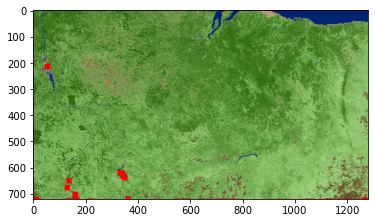

In [20]:
imageArrayMI = np.array(plt.imread('dataset.jpg'), dtype=np.uint8)
for i in pairMI.keys():
    if pairMI[i]>minValueMI:
        indices=i
        x,y,z,k=indices.split("-")
        drawPixels(imageArrayMI,(int(x),int(y)))
        drawPixels(imageArrayMI,(int(z),int(k)))

plt.imshow(imageArrayMI)

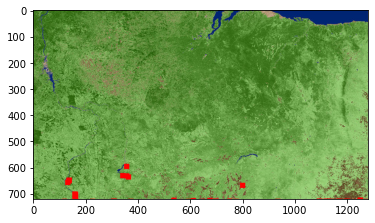

In [21]:
plt.imshow(imageArrayE)

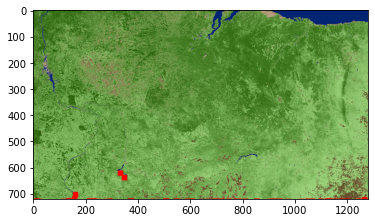

In [22]:
plt.imshow(imageArrayJE)

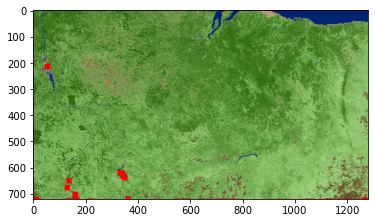

In [23]:
plt.imshow(imageArrayMI)